In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def simulate_and_plot(delta0, delta1, omega0, omega1, gamma0, gamma1, t, N, show_plot=True):

    gamma = gamma0 + gamma1
    delta = delta0 + delta1


    # GS Hamiltonian
    Hg = -delta0 * qt.fock_dm(2,0) - delta1 * qt.fock_dm(2,1)
    
    # coefficients for hamiltonian (directly from paper, trusting their derivation)
    c0 = delta0 - (delta0 * omega0**2)/(4*delta0**2 + gamma**2)
    c1 = delta1 - (delta1 * omega1**2)/(4*delta1**2 + gamma**2)
    c2 = (delta0 + delta1) * (omega0 * omega1)/(8*(delta0 - 1j*gamma/2)*(delta1 + 1j*gamma/2))
    

    # Effective hamiltonian
    Heff = (c0 * qt.fock_dm(2,0) + c1 * qt.fock_dm(2,1) + 
            c2 * qt.basis(2,0) * qt.basis(2,1).dag() + 
            c2.conjugate() * qt.basis(2,1) * qt.basis(2,0).dag() + Hg)

    # Collapse operators
    Leff0 = ((np.sqrt(gamma0) * omega0)/(2*delta0 + 1j*gamma) * qt.fock_dm(2,0) + 
            (np.sqrt(gamma0) * omega1)/(2*delta1 - 1j*gamma) * qt.basis(2,0) * qt.basis(2,1).dag())
    
    Leff1 = ((np.sqrt(gamma1) * omega0)/(2*delta0 - 1j*gamma) * qt.basis(2,1) * qt.basis(2,0).dag() + 
            (np.sqrt(gamma1) * omega1)/(2*delta1 + 1j*gamma) * qt.fock_dm(2,1))

    collapse_ops = [Leff0 , Leff1]
    rho0 = qt.fock_dm(2, 0)
    t_list = np.linspace(0, t, N) * 1/delta  # Time scaling ~ 1/delta, as mentioned in paper
    
    # Solve master equation
    result = qt.mesolve(Heff, rho0, t_list, collapse_ops, [])
    
    # Calculate populations
    pop0 = qt.expect(qt.fock_dm(2, 0), result.states)
    pop1 = qt.expect(qt.fock_dm(2, 1), result.states)

    # Plotting
    if show_plot:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(t_list, pop0, label="Population of |0>")
        ax.plot(t_list, pop1, label="Population of |1>")
        ax.set_xlabel("Time")
        ax.set_ylabel("Population")
        ax.legend()
        plt.show()
        return fig, result
    
    return result


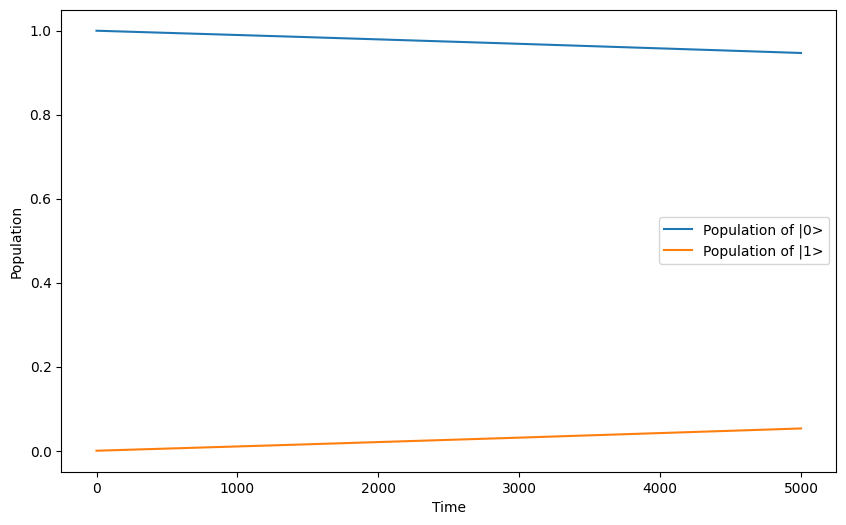

In [ ]:
# Non-unitary case: gamma !=0, and a couple of orders of magnitude < detuning 


if __name__ == "__main__":
    params = {
        'delta0': 1.0,    # GHz detuning
        'delta1': 1.0,    # GHz detuning
        'omega0': 0.1,    # Rabi frequency for |0> -> |e> 
        'omega1': 0.1,    # Rabi frequency for |1> -> |e>
        'gamma0': 0.5,   # decay rate from |e> -> |0>
        'gamma1': 0.5,   # decay rate |e> -> |1>
        't'     : int(1e4),
        'N'     : int(1e5)
    }
    
    simulate_and_plot(**params)

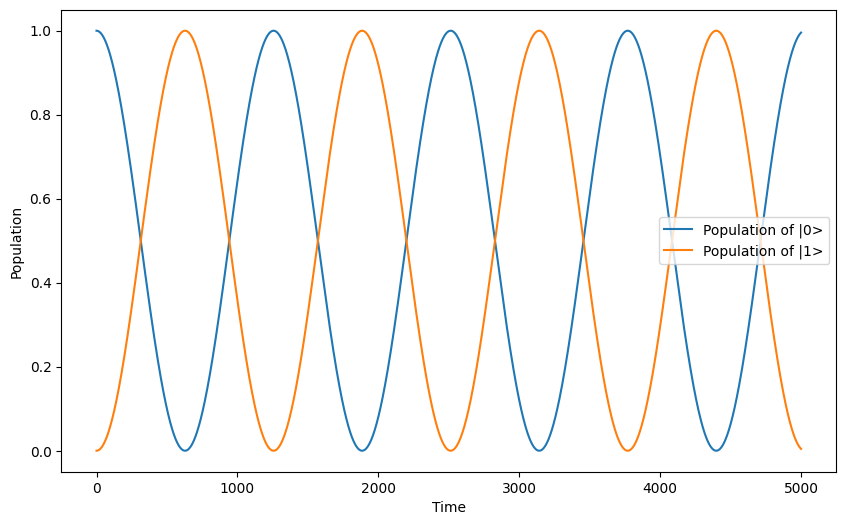

In [ ]:
# Purely unitary case: We expect to see Rabi oscillations

if __name__ == "__main__":
    params = {
        'delta0': 1.0,    # ~ GHz detuning
        'delta1': 1.0,    # ~ GHz detuning
        'omega0': 0.1,    # Rabi frequency for |0> -> |e> 
        'omega1': 0.1,    # Rabi frequency for |1> -> |e>
        'gamma0': 0,   # decay rate from |e> -> |0>
        'gamma1': 0,   # decay rate |e> -> |1>
        't'     : int(1e4),
        'N'     : int(1e4)
    }
    
    simulate_and_plot(**params)